# Data Visualization for VRDK

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter

%matplotlib inline

## Controller Point Data

In [2]:
controller_point_data = pd.read_csv("test123_ControllerPointData.csv")

In [3]:
controller_point_data

,ID,ObjectName,LeftControlPoint,RightControlPoint,PrimaryIndexTrigger,PrimaryHandTrigger,SecondaryIndexTrigger,SecondaryHandTrigger,IsMarked,InterInit,InterEnd,ObjXInit,ObjXEnd,ObjYInit,ObjYEnd,ObjZInit,ObjZEnd
0,test123,Capsule,0,1,0,0,0,0,0,10.23256,12.60707,2.700000,2.700000,1.500000,1.500000,2.700000,2.700000
1,test123,Capsule,0,1,0,0,0,0,0,13.92141,15.14761,2.700000,2.700000,1.500000,1.500000,2.700000,2.700000
2,test123,Floor,0,1,0,0,0,0,0,15.61965,16.31791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,test123,Floor,0,1,0,0,0,0,0,16.81487,17.19181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,test123,Sphere,0,1,0,0,0,0,0,17.76369,18.91299,-2.700000,-2.700000,1.500000,1.500000,2.700000,2.700000
5,test123,Sphere,0,0,0,0,0,1,0,22.44798,26.83541,-2.700000,-2.623074,1.500000,1.535466,2.700000,2.785929
6,test123,Sphere,0,0,0,1,0,0,0,28.49348,30.68064,-2.623074,-2.671928,1.535466,1.451596,2.785929,2.733284
7,test123,Sphere,1,0,0,0,0,0,0,31.32329,32.96863,-2.671928,-2.671928,1.451596,1.451596,2.733284,2.733284
8,test123,Floor,1,0,0,0,0,0,0,33.52330,34.56632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,test123,Floor,1,0,0,0,0,0,0,34.79408,34.87325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Controller Position Data

In [4]:
controller_position_data = pd.read_csv("test123_ControllerPositionData.csv")

In [5]:
controller_position_data

,ID,Hand,XPos,YPos,ZPos,Time
0,test123,Right,0.304352,1.285629,0.093894,9.020837
1,test123,Left,-0.086216,1.219063,0.029789,9.061604
2,test123,Right,0.306034,1.283009,0.095214,9.061604
3,test123,Left,-0.085944,1.219001,0.030156,9.096459
4,test123,Right,0.307582,1.279238,0.095916,9.096459
...,...,...,...,...,...,...
3864,test123,Right,0.198427,0.860933,0.883705,81.910310
3865,test123,Left,0.085805,0.853752,0.893627,81.961240
3866,test123,Right,0.198342,0.860956,0.883750,81.961240
3867,test123,Left,0.085954,0.853724,0.893517,82.032390


## Gaze Data

In [6]:
gaze_data = pd.read_csv("test123_Gaze.csv")

In [7]:
gaze_data

,ID,ObjectName,Start,End
0,test123,Sphere,15.89489,16.28501
1,test123,Sphere,16.32919,33.37849
2,test123,Capsule,34.81036,36.19427
3,test123,Sphere,36.85122,37.49286
4,test123,Cube,39.22190,42.89067
5,test123,Cube,43.39563,45.68243
6,test123,Cube,45.77342,52.74668
7,test123,Cube,53.26842,53.74845
8,test123,Cube,54.79508,59.43029
9,test123,Cube,60.37891,63.80872


In [8]:
# Create a map that holds object name and start and end time as tuples
ID = gaze_data["ID"][0]
objects = gaze_data["ObjectName"]
start_times = gaze_data["Start"]
end_times = gaze_data["End"]
gaze_data_time_map = {}

for idx in range(0, len(objects)):
    if objects[idx] not in gaze_data_time_map.keys():
        new_list = []
        new_list.append((start_times[idx], end_times[idx]))
        gaze_data_time_map[objects[idx]] = new_list
    else:
        gaze_data_time_map[objects[idx]].append((start_times[idx], end_times[idx]))
        

print(gaze_data_time_map)

{'Sphere': [(15.89489, 16.28501), (16.32919, 33.37849), (36.85122, 37.49286), (72.24387, 72.28371)], 'Capsule': [(34.810359999999996, 36.19427)], 'Cube': [(39.2219, 42.89067), (43.39563, 45.68243), (45.77342, 52.746680000000005), (53.26841999999999, 53.74845), (54.795080000000006, 59.43029), (60.37891, 63.808719999999994), (67.34172, 69.10825), (69.36417, 72.20689), (72.28371, 76.43632), (76.50022, 76.57398), (76.64401, 76.74417), (76.77264, 76.88521999999999), (78.26174, 78.48185)], 'Cylinder': [(64.3383, 67.04089)]}


In [9]:
# Find appropriate statistical measures and display results

parsed_data_map = {}

# All statistics we are measuring
object_list = []
total_time_list = []
look_at_count_list = []
avg_time_list = []
shortest_time_list = []
longest_time_list = []

for k, v in gaze_data_time_map.items():
    
    # Find the name of the object we are dealing with
    object_name = k
    object_list.append(object_name)

    # Calculate the total length of time the subject looked at the object.
    total_time = 0
    for start_end in v:
        total_time += (start_end[1] - start_end[0])
    total_time_list.append(total_time)
    
    # Calculate the total number of times the subject looked at the object.
    look_at_count = len(v)
    look_at_count_list.append(look_at_count)
    
    # Calculate the average length of time the subject looked at the object.
    avg_time = total_time / look_at_count
    avg_time_list.append(avg_time)
    
    # Calculate the longest fixation period of time
    stare_lengths = []
    for start_end in v:
        stare_lengths.append(start_end[1] - start_end[0])

    longest_fixation = max(stare_lengths)
    longest_time_list.append(longest_fixation)

# Create the "MASTER LIST". Key will be used as the y-axis label for plots.
parsed_data_map["Name of Object"] = object_list
parsed_data_map["Total Look Time (s)"] = total_time_list
parsed_data_map["Total Look Count"] = look_at_count_list
parsed_data_map["Average Look Time (s)"] = avg_time_list
parsed_data_map["Longest Look Time (s)"] = longest_time_list
    
# Debugging
print(parsed_data_map)

{'Name of Object': ['Sphere', 'Capsule', 'Cube', 'Cylinder'], 'Total Look Time (s)': [18.1209, 1.3839100000000073, 30.742349999999995, 2.7025900000000007], 'Total Look Count': [4, 1, 13, 1], 'Average Look Time (s)': [4.530225, 1.3839100000000073, 2.3647961538461533, 2.7025900000000007], 'Longest Look Time (s)': [17.0493, 1.3839100000000073, 6.973260000000003, 2.7025900000000007]}


['Sphere', 'Capsule', 'Cube', 'Cylinder']
range(0, 4)


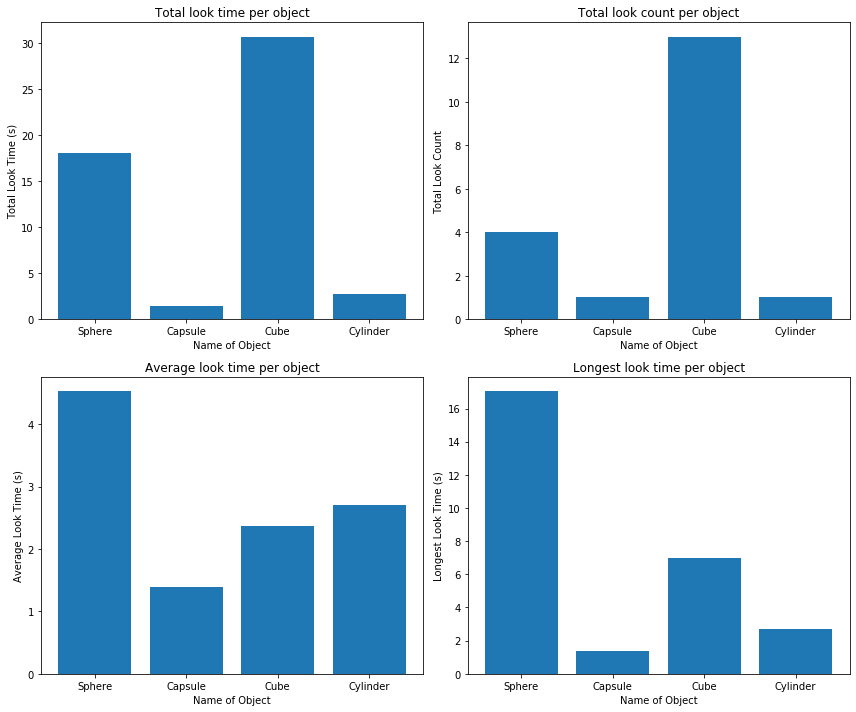

In [10]:
# # Create table of results
# table = pd.DataFrame(data=parsed_data_map)
# table.head()

# Graph the results
keys = list(parsed_data_map)
label = parsed_data_map[keys[0]]
print(label)
indices = range(len(label))
print(indices)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
xloc = 0
yloc = 0

for i in range(1, len(keys)):
    data = parsed_data_map[keys[i]]
    
    if i == 1:
        axes[0, 0].bar(x=indices, height=data)
        axes[0, 0].set_xticks(indices) 
        axes[0, 0].set_xticklabels(label)
        axes[0, 0].set_xlabel(keys[0], fontsize=10)
        axes[0, 0].set_ylabel(keys[i], fontsize=10)
        axes[0, 0].set_title("Total look time per object")
        
    elif i == 2:
        axes[0, 1].bar(x=indices, height=data)
        axes[0, 1].set_xticks(indices) 
        axes[0, 1].set_xticklabels(label)
        axes[0, 1].set_xlabel(keys[0], fontsize=10)
        axes[0, 1].set_ylabel(keys[i], fontsize=10)
        axes[0, 1].set_title("Total look count per object")
        
    elif i == 3:
        axes[1, 0].bar(x=indices, height=data)
        axes[1, 0].set_xticks(indices) 
        axes[1, 0].set_xticklabels(label)
        axes[1, 0].set_xlabel(keys[0], fontsize=10)
        axes[1, 0].set_ylabel(keys[i], fontsize=10)
        axes[1, 0].set_title("Average look time per object")
        
    else:
        axes[1, 1].bar(x=indices, height=data)
        axes[1, 1].set_xticks(indices) 
        axes[1, 1].set_xticklabels(label)
        axes[1, 1].set_xlabel(keys[0], fontsize=10)
        axes[1, 1].set_ylabel(keys[i], fontsize=10)
        axes[1, 1].set_title("Longest look time per object")

fig.tight_layout()

## Player Position Data

In [11]:
player_position_data = pd.read_csv("test123_PlayerPosition.csv")

In [12]:
player_position_data

,UserID,Time,XPos,ZPos
0,test123,9.280869,-0.000008,0.000008
1,test123,9.493715,-0.000008,0.000008
2,test123,9.720088,-0.000009,0.000009
3,test123,9.938070,1.681577,1.620906
4,test123,10.158430,1.681577,1.620906
...,...,...,...,...
326,test123,80.828480,0.315295,-0.149354
327,test123,81.073530,0.315295,-0.149354
328,test123,81.320400,0.315295,-0.149354
329,test123,81.562520,0.315295,-0.149354


Text(0.5, 1, 'User Heatmap')

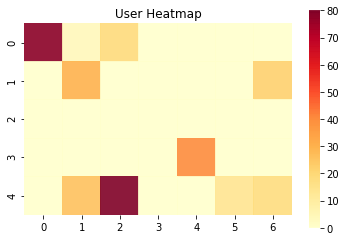

In [13]:
# Get all x and z positions.
xPos = player_position_data["XPos"].to_numpy()
zPos = player_position_data["ZPos"].to_numpy()

# Find max and min X and Z values.
maxX = max(xPos)
minX = min(xPos)
maxZ = max(zPos)
minZ = min(zPos)

# Convert floor to int using floor or ceil.
if maxX < 0:
    maxX = math.floor(maxX)
else:
    maxX = math.ceil(maxX)

if minX < 0:
    minX = math.floor(minX)
else:
    minX = math.ceil(minX)
    
if maxZ < 0:
    maxZ = math.floor(maxZ)
else:
    maxZ = math.ceil(maxZ)
    
if minZ < 0:
    minZ = math.floor(minZ)
else:
    minZ = math.ceil(minZ)

# Debugging
# print(maxX)
# print(minX)
# print(maxZ)
# print(minZ)

pos = [list(a) for a in zip(xPos, zPos)]
posMap = [[0 for i in range((maxZ-minZ))] for j in range((maxX-minX))]

for i in range(len(pos)):
    posMap[int(pos[i][0])][int(pos[i][1])] += 1

hmap = sns.heatmap(posMap, vmin=np.min(posMap), vmax=np.max(posMap), cmap = "YlOrRd", alpha = 0.9, zorder = 2, square = True)
plt.title('User Heatmap')

In [14]:
# End of File